In [23]:
import os 
import numpy as np
import pandas as pd


In [27]:
experiment = "exp3"
DIRECTORY = "../data/heuristic_elo_correlation_data/" + experiment
heuristics_data_path = DIRECTORY + "/Heuristics Elo Data"
heuristic_elo_correlation_path = os.path.join(DIRECTORY, "Correlation_Values.txt")

# with open(heuristic_elo_correlation_path, 'w') as f:
#     f.write("Heuristic, Correlation_Value \n")

# for file_name in os.listdir(heuristics_data_path):
#         # name = os.path.join(DIRECTORY, file_name)
#         print(file_name)

with open(heuristic_elo_correlation_path, 'w') as f:
    f.write("Heuristic, Correlation_Value \n")
    for file_name in os.listdir(heuristics_data_path):
        # name = os.path.join(DIRECTORY, file_name)
        FILEPATH = os.path.join(heuristics_data_path, file_name)
        # print(FILEPATH)
        
        df = pd.read_csv(FILEPATH)
        # df['Heuristic_Value'] = pd.to_numeric(df['Heuristic_Value'])
        # df['Elo_Value'] = pd.to_numeric(df[' Elo_Value '])
        corr = df.corr()
        correlation_value = corr.iloc[0,1]
        heuristic = file_name[:len(file_name)-4]
        f.write(f"{heuristic}, {correlation_value}\n")

        

In [28]:
df = pd.read_csv(heuristic_elo_correlation_path)
df
# print(df.columns)

,Heuristic,Correlation_Value
0,Aggr Pieces Anti Centrality,-0.680981
1,Aggr Pieces Middle Prox,-0.804957
2,Aggr Pieces,-0.655123
3,Aggression Diff,-0.428704
4,Anti Centrality,-0.306350
5,Attack in-sync,-0.506022
6,Centrality,-0.457033
7,Defended Hexes Middle Prox,0.640579
8,Defended Hexes,0.288409
9,Impt Pieces,-0.144138


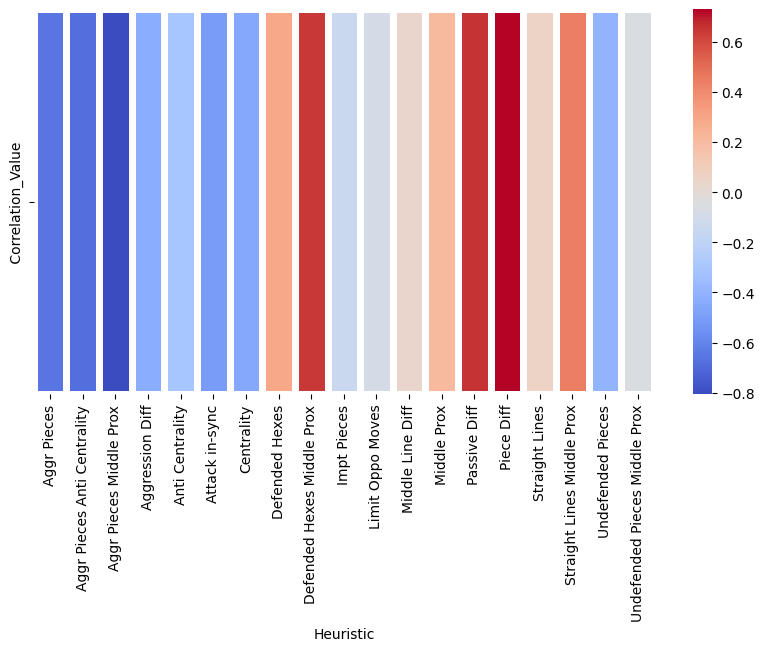

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
df_heatmap = df.pivot_table(index=None, columns='Heuristic', values=' Correlation_Value ') 
sns.heatmap(df_heatmap, annot=False, cmap='coolwarm', linewidths=5, cbar_kws={'orientation': 'vertical'})

# #save the plot
FIGURE_DIRECTORY = "../graphs/Heuristic Elo Heatmaps/" + experiment + "Heatmap"
plt.savefig(FIGURE_DIRECTORY, dpi=700)
# show the plot
plt.show()



